In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.fftpack 
import matplotlib.pyplot as plt

In [20]:
signal = pd.read_excel("datos/signal.xlsx")

In [21]:
signal.head()

,time,signal
0,0.000000,2
1,0.003906,2
2,0.007812,3
3,0.011719,5
4,0.015625,8


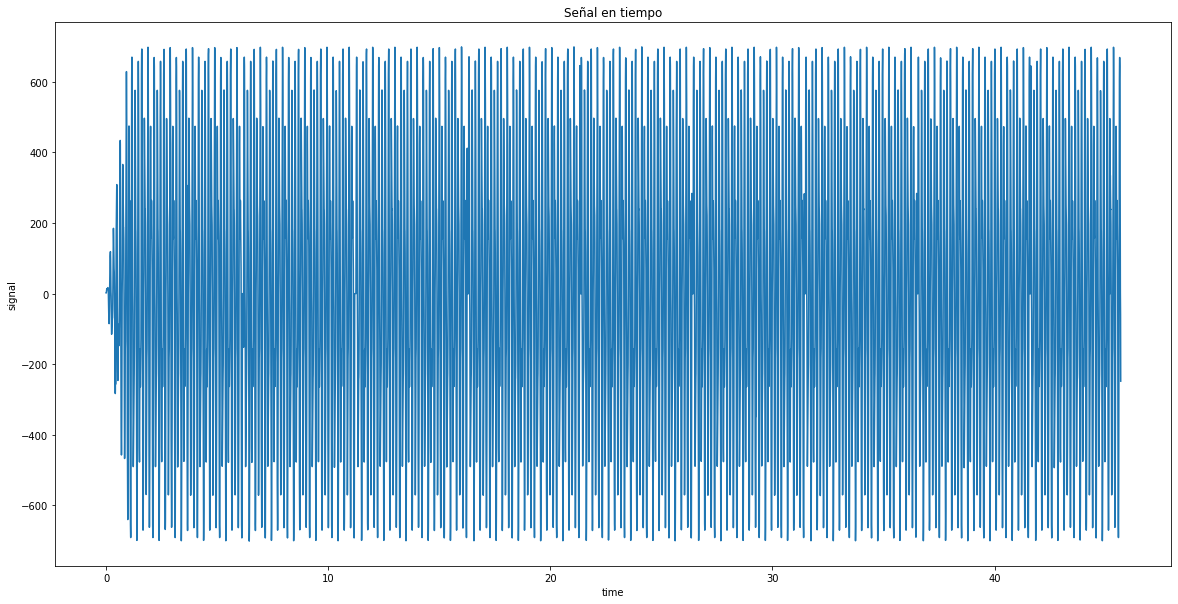

In [22]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="time", y="signal", data=signal)
plt.title("Señal en tiempo")
plt.show()

## Separar las señales

In [23]:
y = signal["signal"]
X = signal["time"]

## parámetros para furier

In [24]:
# Numero de puntos
N = len(X)
# tiempo de muestreo
T = X[2] - X[1]

## fft y creacion de el vector de frecuencia

In [25]:
yfft = scipy.fftpack.fft(y) 
yf = 2.0/N * np.abs(yfft[:N//2]) # Esto no me acuerdo porque es asi pero tiene que ser esa formula rara

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)  # vector de frecuencia que tampoco me acuerdo porque es esa formula

signal_fft = pd.DataFrame({"frec":xf, "amp":yf}) # meter todo en una tabla

In [26]:
signal_fft.head()

,frec,amp
0,0.000000,0.608123
1,0.021895,0.296706
2,0.043791,0.304615
3,0.065686,0.331254
4,0.087581,0.316528


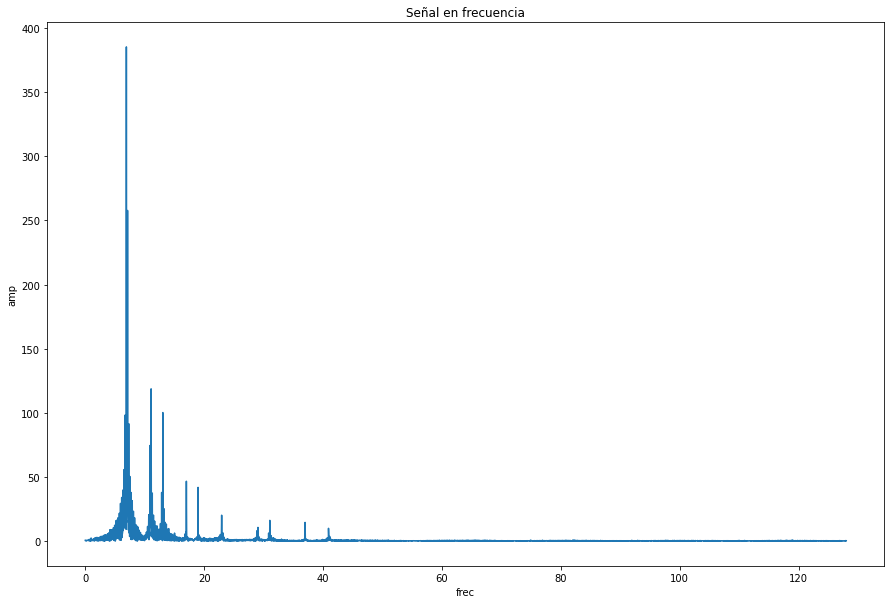

In [27]:
plt.figure(figsize=(15,10))
ax2 = sns.lineplot(x="frec", y="amp", data=signal_fft)
plt.title("Señal en frecuencia")
plt.show()

In [10]:
signal_fft.to_excel("furier_signal.xlsx", index=False)